In [21]:
# Decision Tree Classification using python
# Supervised technique

import pandas as pd               
cr = pd.read_csv("E:\Data_Science\datasets\CreditRisk.csv")
cr

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,LP002971,Male,Yes,4.0,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,Y
977,LP002975,Male,Yes,0.0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,Y
978,LP002980,Male,No,0.0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,Y
979,LP002986,Male,Yes,0.0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,N


In [22]:
cr.isnull().sum()   

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
cr.Credit_History = cr.Credit_History.fillna(0)
cr.Self_Employed = cr.Self_Employed.fillna('Yes')
cr.LoanAmount = cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Dependents = cr.Dependents.fillna(0)
cr.Gender = cr.Gender.fillna('Male')
cr.Loan_Amount_Term = cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.median())
cr.Married = cr.Married.fillna('No')
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
cr.Gender.replace({'Male' : 1, 'Female':0}, inplace = True)

In [25]:
cr.Married.replace({'Yes':1,'No':0},inplace = True)

In [26]:
cr.Education.replace({'Graduate':1,'Not Graduate':0},inplace = True)

In [27]:
cr.Property_Area.replace({'Semiurban':1,'Urban':2,'Rural':3},inplace = True)

In [28]:
cr.Loan_Status.replace({'Y':1,'N':0},inplace = True)

In [29]:
cr.Self_Employed.replace({'Yes':1,'No':0},inplace = True)

In [30]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2,1
1,LP001003,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3,0
2,LP001005,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2,1
3,LP001006,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,LP001008,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2,1


In [31]:
cr_x = cr.iloc[:, 1:12]     #independent variables
cr_y = cr.iloc[:, -1]       #dependent varaiable
cr_x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.0,1,0,5849,0.0,142.51153,360.0,1.0,2
1,1,1,1.0,1,0,4583,1508.0,128.00000,360.0,1.0,3
2,1,1,0.0,1,1,3000,0.0,66.00000,360.0,1.0,2
3,1,1,0.0,0,0,2583,2358.0,120.00000,360.0,1.0,2
4,1,0,0.0,1,0,6000,0.0,141.00000,360.0,1.0,2


In [32]:
import sklearn
from sklearn.model_selection import train_test_split
cr_x_train,cr_x_test,cr_y_train,cr_y_test = train_test_split(cr_x,cr_y,test_size = .2, random_state = 101)

In [33]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(cr_x_train, cr_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
pred = dtree.predict(cr_x_test)

In [35]:
from sklearn.metrics import confusion_matrix
matrix2 = confusion_matrix(pred, cr_y_test)
matrix2

array([[ 28,  28],
       [ 29, 112]], dtype=int64)

In [36]:
acc2 = matrix2.diagonal().sum()/matrix2.sum()
acc2

0.7106598984771574

In [37]:
# Shows the importance of the feature in probabilities between 0 to 1
dtree.feature_importances_

array([0.02314511, 0.03782086, 0.02361979, 0.01924052, 0.01670185,
       0.26113409, 0.10609086, 0.1922267 , 0.02926784, 0.26114729,
       0.02960508])

In [38]:
feature_score = pd.DataFrame({"column names":cr_x_train.columns,"Importance":dtree.feature_importances_})
feature_score
feature_score.sort_values(['Importance'], ascending = False)

,column names,Importance
9,Credit_History,0.261147
5,ApplicantIncome,0.261134
7,LoanAmount,0.192227
6,CoapplicantIncome,0.106091
1,Married,0.037821
10,Property_Area,0.029605
8,Loan_Amount_Term,0.029268
2,Dependents,0.023620
0,Gender,0.023145
3,Education,0.019241


In [39]:
dtree.feature_importances_.sum()

1.0

In [41]:
pred_prob = dtree.predict_proba(cr_x_test)
pred_prob

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve

In [43]:
precision, recall, threshold = precision_recall_curve(cr_y_test, pred_prob[:,1])
prec1, rec1, th1 = precision_recall_curve(cr_y_test, pred_prob[:,0])

Text(0.5, 1.0, 'precision - Recall')

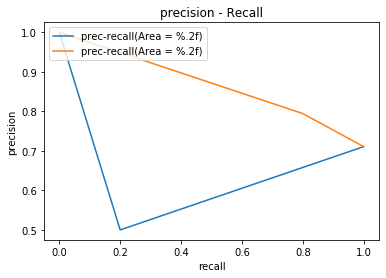

In [45]:
import matplotlib.pyplot as plt

plt.plot(rec1, prec1, label = 'prec-recall(Area = %.2f)')
plt.plot(recall, precision, label = 'prec-recall(Area = %.2f)')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 'upper left')
plt.title('precision - Recall')